In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
class LR:
    def __init__(self):
        self.costs = []
    
    def init_weights(self, num_features):
        return np.zeros(num_features)
                            
    
    def add_bias(self, X):
        return np.insert(X, 0, 1, axis=1)
    
    def caculate_loss(self, a, y):
        m = len(y)
        cost = (1 / m) * (np.sum(-y.T.dot(np.log(a)) - (1 - y).T.dot(np.log(1 - a))))
        return cost
        
    
    def fit(self, X, y, alpha=0.01, num_iterations=100):
        self.classes = np.unique(y)
        self.params = []
        X = self.add_bias(X)
        
        m = X.shape[0]
        
        for c in self.classes:
            each_costs = []
            y_onevsall = np.where(y == c, 1, 0)
            w = self.init_weights(X.shape[1])
                            
            for i in range(num_iterations):
                a = sigmoid(X.dot(w))
                dw = (1/m) * X.T.dot(a - y_onevsall)
                w -= alpha * dw
                each_costs.append(self.caculate_loss(a, y_onevsall))
            self.costs.append(each_costs)
            self.params.append((c, w))
            

    def predict(self, X):
        X = self.add_bias(X)                   
        y_preds = []
        for x in X:
            one_vs_rest_preds = []
            for c, w in self.params:
                one_vs_rest_preds.append((sigmoid(x.dot(w)), c))
#             print(one_vs_rest_preds)
            y_preds.append(max(one_vs_rest_preds)[1])
        return y_preds
    
    def get_params(self):
        return [w for c,w in self.params]
    
    def get_costs(self):
        return self.costs

In [5]:
data = pd.read_csv('random_dataset.csv', header=None)

In [6]:
X = data[[0,1]]
y = data[2]

In [7]:
def normalize(df):
    new_df = df.copy()
    for col in df.columns:
        new_df[col] -= df[col].mean()
        new_df[col] /= df[col].std()
    return new_df
X = normalize(X)

In [8]:
lr = LR()
lr.fit(X.to_numpy(), y.to_numpy(), 0.01, 1000)

In [9]:
(lr.predict(X.to_numpy()) == y).sum() / len(y)

1.0

In [10]:
params = lr.get_params()

AttributeError: 'Line2D' object has no property 'linestyles'

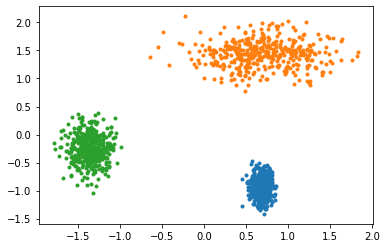

In [11]:
fig, ax = plt.subplots()
groups = X.groupby(y)
columns = X.columns

for name, group in groups:
    ax.plot(group[0], group[1], marker=".", linestyle="", label='Class: ' + str(int(name)))

for b, w1, w2 in params:
    yx = -w1/w2 * X.to_numpy()[:,0] - b/w2
    ax.plot(X.to_numpy()[:,0], yx, linestyles="--")


ax.legend()
ax.set_title('desicion boundries plot')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_ylim(-2,2)

In [12]:
costs = lr.get_costs()

Text(0, 0.5, 'cost')

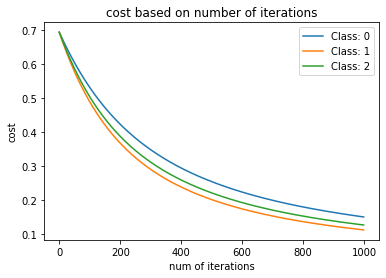

In [13]:
fig, ax = plt.subplots()
for i in range(len(np.unique(y))):
    x = np.arange(len(costs[0]))
    ax.plot(x, costs[i], label= 'Class: ' + str(i))
plt.legend()
ax.set_title('cost based on number of iterations')
ax.set_xlabel('num of iterations')
ax.set_ylabel('cost')

In [174]:
params

[array([-0.5827544 ,  1.25244689, -1.64532769]),
 array([-0.89208909,  0.74852319,  1.81175892]),
 array([-0.75704311, -2.00261457, -0.2086396 ])]